## Assignment 11  

### Clustering 

In [1]:
# if needed install python packages via the following commands
# !pip install fastcluster
# !pip install hdbscan

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import fastcluster
from scipy.cluster.hierarchy import fcluster
import hdbscan
import matplotlib.pyplot as plt 
import seaborn as sns 

Artificial datasets will be used.  
The datasets compromise of 2 or 3 clusters.  
To define the best number of clusters (how are data best seperable) silhouette score will be used.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
*  1: Means clusters are well apart from each other and clearly distinguished.
*  0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.  

Silhouette scores are calculated between 2 to 6 clusters and the number of clusters that best seperates the data according to silhouette coefficient is then plotted.

In [3]:
blobs_data = datasets.make_blobs(n_samples=400,
                                 n_features=2, 
                                 centers=3,
                                 center_box=(-7,7),
                                 cluster_std=0.8,
                                 random_state=613
                                 )
                                
moons_data = datasets.make_moons(n_samples=400,
                                 noise=0.1,
                                 random_state=613
                                 )

circles_data = datasets.make_circles(n_samples=400,
                                     noise=0.05,
                                     factor=0.7,
                                     random_state=613
                                     )

varied_blobs_data = datasets.make_blobs(n_samples=400,
                                        n_features=2,
                                        centers=3,
                                        center_box=(-7,7),
                                        cluster_std=[0.6, 1.5, 2.5],
                                        random_state=613
                                        )

transformation = [[0.5, -1], [-0.2, 1]]
aniso_data = (np.dot(blobs_data[0], transformation), blobs_data[1])

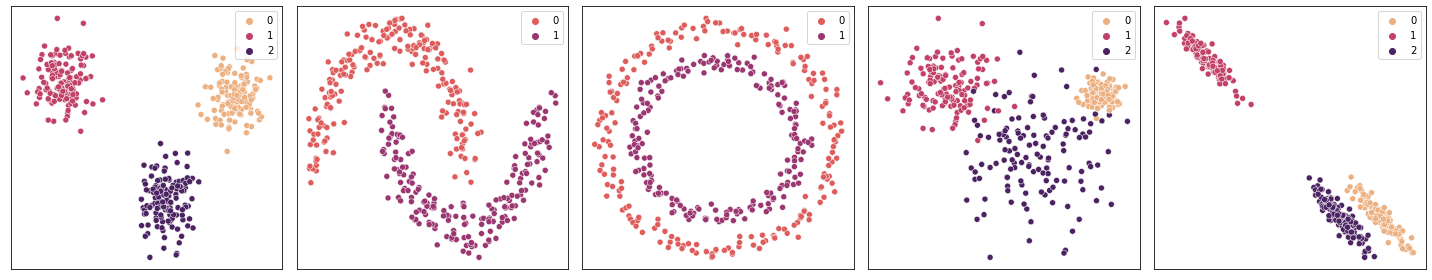

In [4]:
plt.figure(figsize=(20,4))
for n, data in zip(range(1,6), [blobs_data, moons_data, circles_data, varied_blobs_data, aniso_data]):
    X, y = data[0], data[1]
    df = pd.DataFrame(data={f'predictor_{n}1': X[:,0],
                            f'predictor_{n}2': X[:,1],
                            f'cluster_{n}': y})
    if n==1:
        data_df = df
    else:
        data_df = pd.concat([data_df, df], axis=1)

    # plot the datasets
    plt.subplot(1,5,n)
    sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=f'cluster_{n}', data=df, palette='flare')
    plt.legend(loc='upper right')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

Transform all values in range [0,1]

In [5]:
scaler = MinMaxScaler()
colnames = data_df.columns
data_df = pd.DataFrame(scaler.fit_transform(data_df))
data_df.columns = colnames

### Agglomerative clustering

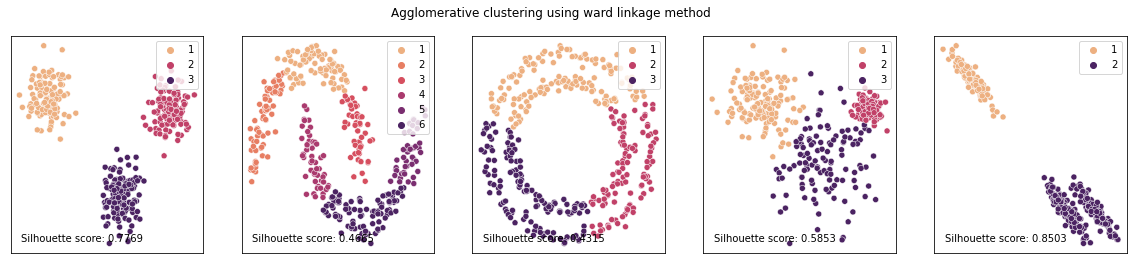

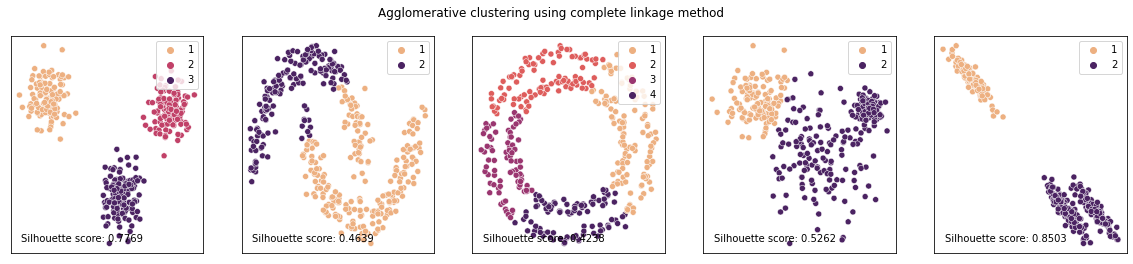

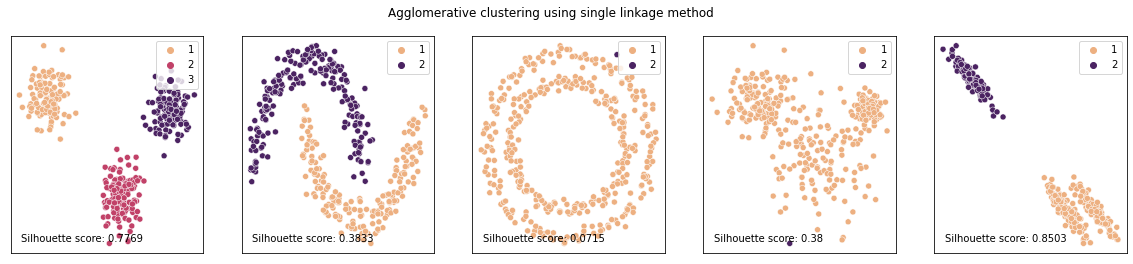

In [6]:
for linkage_method in ['ward', 'complete', 'single']:
    plt.figure(figsize=(20,4))
    plt.suptitle(f'Agglomerative clustering using {linkage_method} linkage method')
    for n in range(1,6):
        # run clustering
        Z = data_df[[f'predictor_{n}1', f'predictor_{n}2']].to_numpy()
        clust = fastcluster.linkage(Z, method=linkage_method, metric='euclidean')
        
        # calculate silhouette scores for different numbers of clusters
        sil_scores = [(k, silhouette_score(Z, labels = fcluster(clust, k, criterion='maxclust'))) for k in range(2,7)]
        best_score = sorted(sil_scores, key=lambda x: x[1], reverse=True)[0]
        # generate labels based on the optimal number of clusters       
        clust_member = fcluster(clust, best_score[0], criterion='maxclust')

        plt.subplot(1,5,n)
        sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=clust_member, data=data_df, palette='flare')
        plt.legend(loc='upper right')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        plt.text(x=0.01, y=0.01, s=f'Silhouette score: {round(best_score[1], 4)}')
    plt.show()

### DBSCAN  
DBSCAN automatically selects the best number of clusters, so the silhouette score of the algorithm's selected clusters is printed.

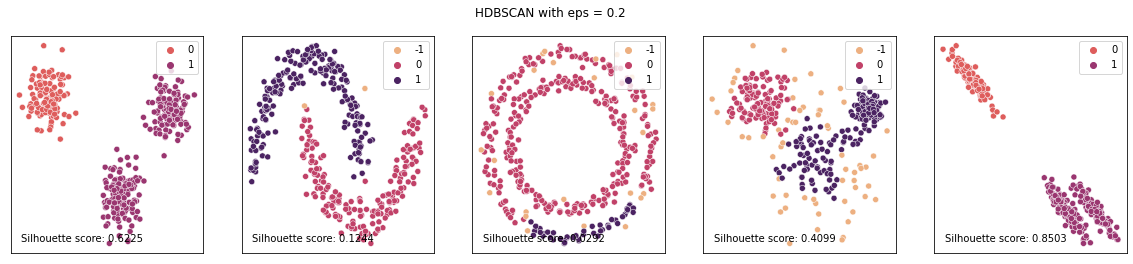

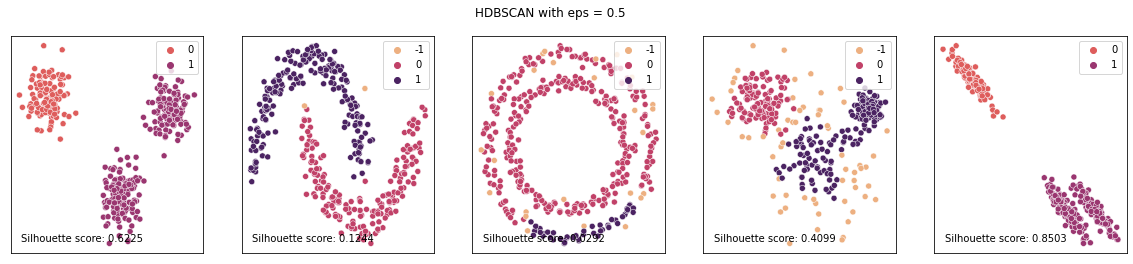

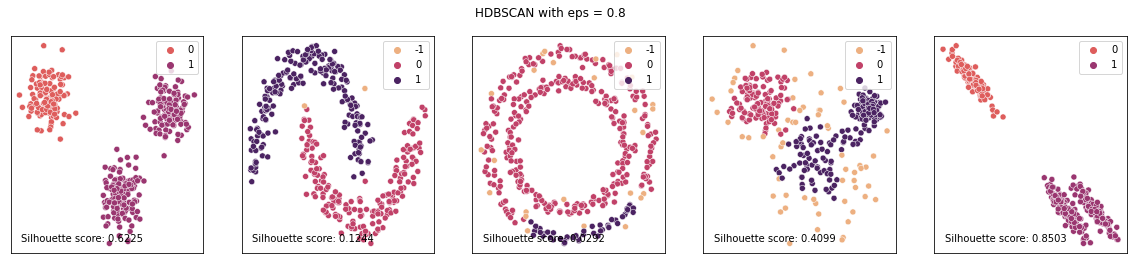

In [45]:
for epsilon in [0.2, 0.5, 0.8]:
    plt.figure(figsize=(20,4))
    plt.suptitle(f'HDBSCAN with eps = {epsilon}')
    for n in range(1,6):
        Z = data_df[[f'predictor_{n}1', f'predictor_{n}2']].to_numpy()
        clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=epsilon)
        clusterer.fit(Z)
        clust_member = clusterer.labels_
        silh_score = silhouette_score(Z, labels=clust_member)

        plt.subplot(1,5,n)
        sns.scatterplot(x=f'predictor_{n}1', y=f'predictor_{n}2', hue=clust_member, data=data_df, palette='flare')
        plt.legend(loc='upper right')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        plt.text(x=0.01, y=0.01, s=f'Silhouette score: {round(silh_score, 4)}')
    plt.show()

Resources:
* Fastcluster [link](http://danifold.net/fastcluster.html)
* scikit-learn [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)